Kaggle: https://www.kaggle.com/harlfoxem/housesalesprediction

Tutorial: https://www.kaggle.com/jiuzhang/ai-camp-linear-regression

Tutorial2: https://www.kaggle.com/jiuzhang/aicamp-ensemble-exercise-2-complete-version

In [1]:
import numpy as np
import pandas as pd

In [2]:
TRAIN_DIR = './input/kc_house_data.csv'

# Explantory Data Analyisis - Take a Glance at the Data

In [3]:
train = pd.read_csv(TRAIN_DIR)

In [4]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
train.shape

(21613, 21)

In [6]:
train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Explantory Data Analyisis - Research

In [7]:
import matplotlib.pyplot as plt
import seaborn as sn

1.Scatter Plot

In [8]:
X = train[['bedrooms', 'bathrooms', 'sqft_living',
           'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
           'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
           'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y = train['price']

Text(0.5, 1.0, 'price~floors')

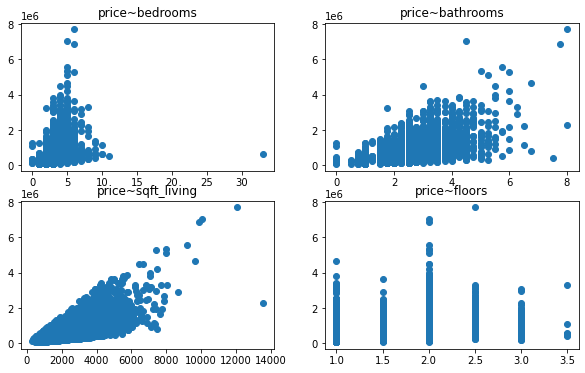

In [9]:
fig = plt.figure(figsize = (10, 6))
plt.subplot(221)
plt.scatter(X['bedrooms'], y)
plt.title('price~bedrooms')
plt.subplot(222)
plt.scatter(X['bathrooms'], y)
plt.title('price~bathrooms')
plt.subplot(223)
plt.scatter(X['sqft_living'], y)
plt.title('price~sqft_living')
plt.subplot(224)
plt.scatter(X['floors'], y)
plt.title('price~floors')

2.Correlation Matrix

<AxesSubplot:>

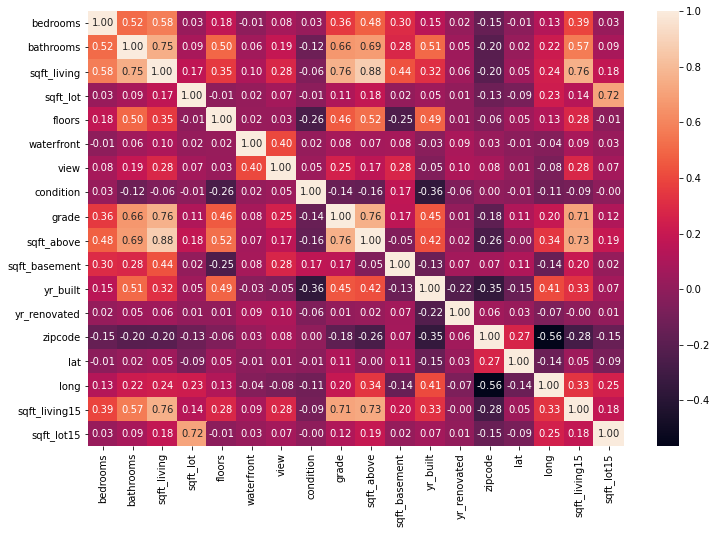

In [10]:
fig = plt.figure(figsize=(12, 8))
sn.heatmap(X.corr(), annot=True, fmt='.2f')

Observation: There are some kinds of correlation, which is not good.

# Prepare Data

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
def scaler_encode_data(data):
    scalers = {}
    for col in data.columns:
        scaler = StandardScaler()
        col_data = np.array(data[col]).astype(np.float64).reshape(-1, 1)
        scaler.fit(col_data)
        scalers[col] = scaler
        
    num_samples, num_features = data.shape
    X = np.zeros((num_samples, num_features))
    col_num = 0
    for col, scaler in scalers.items():
        col_data = np.array(data[col]).astype(np.float64).reshape(-1, 1)
        X[:, col_num] = scaler.transform(col_data).squeeze()
        col_num += 1
        
    return X

In [13]:
X_norm = scaler_encode_data(X)

# Models

In [14]:
from sklearn.model_selection import cross_val_score

1.Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
cross_val_score(lr, X, y, cv=8).mean() # score is R^2

0.6938177545328512

In [16]:
lr.fit(X, y)
print(f'Intercept: {lr.intercept_}')
pd.DataFrame(list(zip(X.columns, lr.coef_)))

Intercept: 6690324.603094365


,0,1
0,bedrooms,-35766.541444
1,bathrooms,41144.278533
2,sqft_living,110.442865
3,sqft_lot,0.128598
4,floors,6689.550115
5,waterfront,582960.458423
6,view,52870.942384
7,condition,26385.649139
8,grade,95890.445151
9,sqft_above,70.785224


2.Random Forest

In [17]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
cross_val_score(rf, X_norm, y, cv=8).mean()

0.8746436285145364